In [1]:
import pandas as pd
import numpy as np

In [2]:
training_data= pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Desktop\task4_train_dataset.csv")
testing_data= pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Desktop\test_dataset.csv")

In [3]:
training_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
testing_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
training_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
training_data.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
training_data= training_data.dropna(axis=0)

In [8]:
training_data.isnull().sum()

x    0
y    0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model= LinearRegression()

In [10]:
x_train= training_data['x']
y_train= training_data.drop('x', axis=1)

x_test= testing_data['x']
y_test= testing_data.drop('x', axis=1)

Text(0, 0.5, 'Y -->')

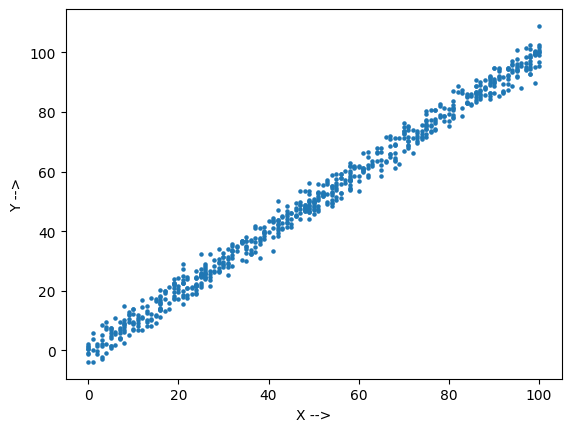

In [11]:
plt.scatter(x_train, y_train, s=5)
plt.xlabel('X -->')
plt.ylabel('Y -->')

<Axes: xlabel='x', ylabel='y'>

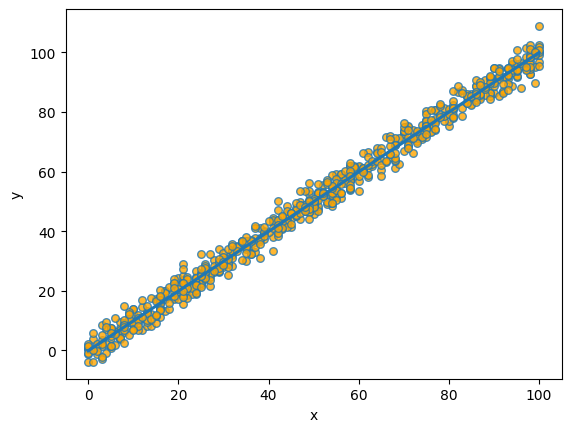

In [12]:
sns.regplot(x= x_train, y= y_train, scatter_kws={'s':30, 'facecolor':'orange'})

In [13]:
model.fit(y_train, x_train)

LinearRegression()

In [14]:
m= model.intercept_
c= model.coef_
m,c

(0.5712547832981514, array([0.99005168]))

In [15]:
y_hat= model.predict(y_test)

In [16]:
y_test.shape

(300, 1)

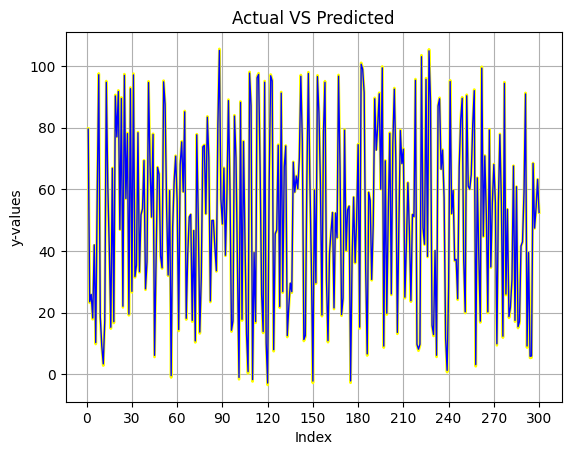

In [17]:
index= [i for i in range(1,301)]
plt.plot(index,y_test , color="yellow" , linewidth=2, linestyle='-')
plt.plot(index,y_hat , color="blue", linewidth=1, linestyle='-')

plt.title('Actual VS Predicted')
plt.xlabel('Index')
plt.ylabel('y-values')

plt.xticks(np.arange(0,330, step=30))
plt.yticks(np.arange(0,120, step=20))
plt.grid()

In [18]:
from sklearn import metrics

In [19]:
print("MSE= ", metrics.mean_squared_error(y_hat, y_test))
print("R^2= ", metrics.r2_score(y_hat, y_test))

MSE=  0.08719048744399262
R^2=  0.999894398732066


Looking at the value of MSE and R^2, We conclude that our trained model is 99.98% accurate on test data!

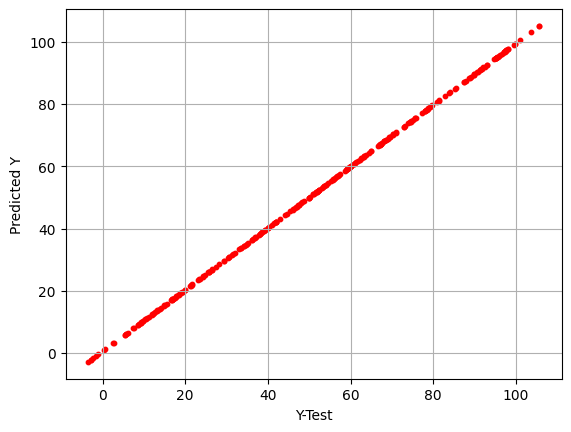

In [20]:
plt.scatter(y_test,y_hat, s=10, color='red')
plt.xlabel('Y-Test')
plt.ylabel('Predicted Y')
plt.grid()